In [4]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [5]:
os.getcwd()

'C:\\Users\\Kaio\\Documents\\outspoken-DS\\python\\ciencia dos dados\\Linear regression - ds'

In [6]:
    df = pd.read_csv('../../../material/#ZM/Ciencia dos Dados na Pratica-Outspoken-2020/6. Ciência dos Dados com Python/2. 2 - GLM - Regressão Linear/Materiais/winequality-red.csv', sep=';')

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Text(0.5, 1.0, 'Distribuição da qualidade')

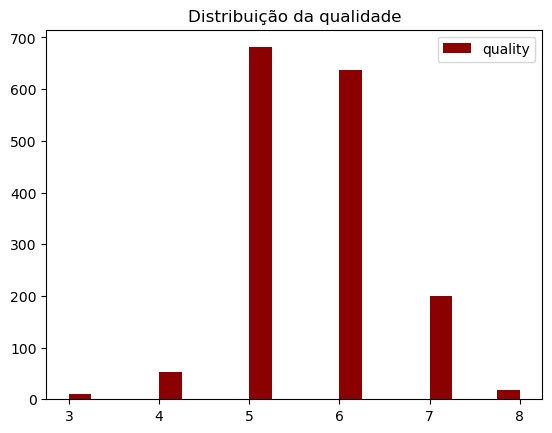

In [8]:
plt.hist(df['quality']
        ,label='quality'
        ,bins=20
        ,edgecolor=None
        ,color='Darkred')
plt.legend()
plt.title('Distribuição da qualidade')

### Verificando se os X tem correlação. Uma das premissar da RL é que nao deve ter correlação entre X's

In [10]:
corr_df = df.corr()['quality'].drop('quality')

corr_df

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

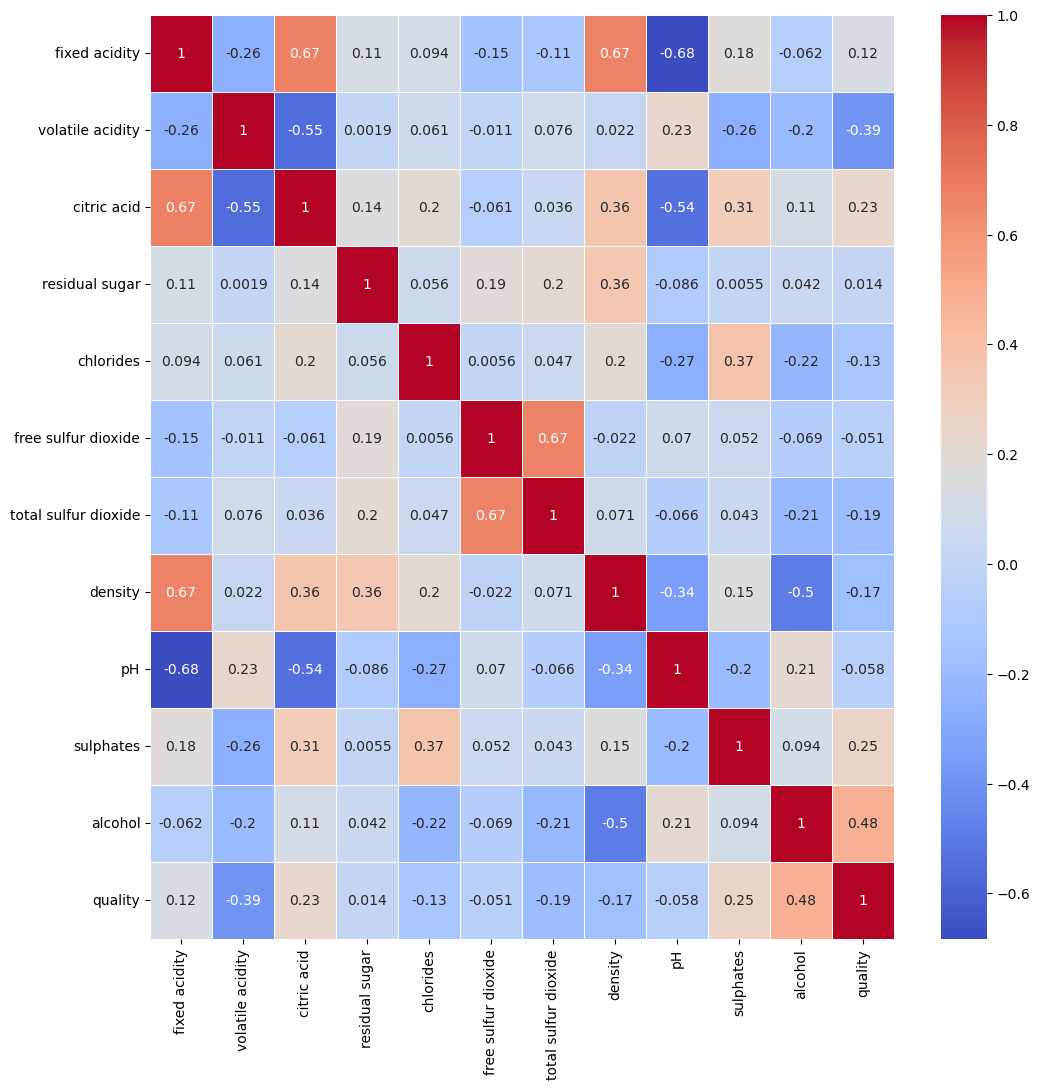

In [11]:
corr_df = df.corr()
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_df, annot=True,ax=ax, linewidths=.6,cmap='coolwarm');

### Removendo as vareaveis com correlação > |0.5|

In [13]:
corr_wine = df.corr().abs()

superior = corr_wine.where(np.triu(np.ones(corr_wine.shape), k=1).astype(bool))

var_remove = [vareaveis for vareaveis in superior.columns if any(superior[vareaveis]>0.5)]

df = df.drop(df[var_remove], axis=1)

In [14]:
var_remove
# colunas retiradas

['citric acid', 'total sulfur dioxide', 'density', 'pH']

In [15]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### separando X e y

In [17]:
X = df.drop('quality',axis=1)
y = df['quality']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)

## criando e treinando o modelo

In [20]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
pred_test = lr.predict(X_test)
pred_train = lr.predict(X_train)

### Analise do modelo

In [23]:
from math import sqrt

mae_train = metrics.mean_absolute_error(y_train,pred_train)
r2_train = sqrt(metrics.r2_score(y_train,pred_train))
rmse_train = metrics.root_mean_squared_error(y_train,pred_train)

print('-------------Avaliação do modelo treino-----------------')
print(f'Mae:{mae_train:.2f}:.')
print(f'R2:{r2_train:.2f}')
print(f'RMSE{rmse_train:.2f}')

mae_test = metrics.mean_absolute_error(y_test,pred_test)
r2_test = sqrt(metrics.r2_score(y_test,pred_test))
rmse_test = metrics.root_mean_squared_error(y_test,pred_test)

print('-------------Avaliação do modelo teste------------------')
print(f'Mae:{mae_test:.2f}')
print(f'R2:{r2_test:.2f}')
print(f'RMSE{rmse_test:.2f}')


-------------Avaliação do modelo treino-----------------
Mae:0.53:.
R2:0.57
RMSE0.68
-------------Avaliação do modelo teste------------------
Mae:0.50
R2:0.60
RMSE0.63


In [24]:
print('porcentual da MAE em relação a média da base')
print((round(metrics.mean_absolute_error(y_test,pred_test)/y_test.mean(),4)*100))

porcentual da MAE em relação a média da base
8.870000000000001


### checando os pesos da regressão linear

In [26]:
coef = pd.DataFrame(lr.coef_,df.columns[0:7])
coef.columns = ['Coeficientes']
print(coef)

                     Coeficientes
fixed acidity            0.022830
volatile acidity        -0.915731
residual sugar          -0.021884
chlorides               -2.393117
free sulfur dioxide     -0.001503
sulphates                0.958897
alcohol                  0.295773


In [27]:
lr.intercept_

2.5053746243491357

### formula aplicada

lr = 2.8149769501572415 + 0.025735 * fixed acidity + -1.093314 * volatile acidity + 0.006970 * residual sugar + -1.522678 * chlorides + -0.003461 * free sulfur dioxide + 0.858598 * sulphates + 0.270586 + alcohol

In [29]:
lr.predict([[11.2,0.76,2.3,0.092,15.0,0.65,9.8]])

C:\Users\Kaio\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.29393448])

In [30]:
df.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,sulphates,alcohol,quality
0,7.4,0.70,1.9,0.076,11.0,0.56,9.4,5
1,7.8,0.88,2.6,0.098,25.0,0.68,9.8,5
2,7.8,0.76,2.3,0.092,15.0,0.65,9.8,5
3,11.2,0.28,1.9,0.075,17.0,0.58,9.8,6
4,7.4,0.70,1.9,0.076,11.0,0.56,9.4,5


In [31]:
pd.DataFrame({'real':y_test,'previsto':pred_test})

,real,previsto
430,7,6.428908
1254,5,5.667312
497,5,6.064304
402,6,5.746030
955,5,5.955143
...,...,...
317,6,5.404384
1123,6,6.058337
982,6,6.507507
204,6,5.260475


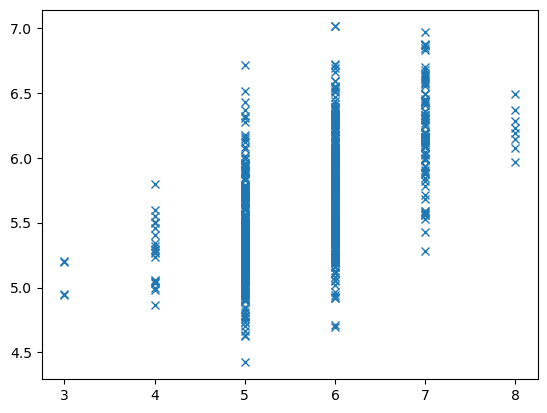

In [32]:
plt.plot(y_test,pred_test,'x')

### Treinamento e teste da regressao linear com Statsmodels

In [34]:
pcs
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     54.14
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           3.33e-63
Time:                        10:39:46   Log-Likelihood:                -824.04
No. Observations:                 799   AIC:                             1664.
Df Residuals:                     791   BIC:                             1702.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5054      0.343      7.313      0.000       1.833       3.178
fixed acidity           0.0228      0.015      1.532      0.126      -0.006       0.052
volatile acidity       -0.9157      0.149     -6.166      0.000      -1.207      -0.624
residual sugar         -0.0219      0.018     -1.191      0.234      -0.058       0.014
chlorides              -2.3931      0.629     -3.806      0.000      -3.627      -1.159
free sulfur dioxide    -0.0015      0.003     -0.597      0.551      -0.006       0.003
sulphates               0.9589      0.168      5.723      0.000       0.630       1.288
alcohol                 0.2958      0.024     12.381      0.000       0.249       0.343
==============================================================================
Omnibus:                       19.511   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.000
Skew:                          -0.259   Prob(JB):                     2.26e-06
Kurtosis:                       3.716   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Avaliaçao dos resultados com statsmodels

MAE_train_sm = statsmodels.tools.eval_measures.meanabs(y_train, pred_train)
R2_train_sm = lr_sm.rsquared # Coeficiente de determinaçao
RMSE_train_sm = statsmodels.tools.eval_measures.rmse(y_train, pred_train)

print("----- Avaliaçao do treinamento -----")
print("MAE: ", round(MAE_train_sm,2))
print('R2: ', round(R2_train_sm,2))
print('RMSE: ', round(RMSE_train_sm,2))

MAE_test_sm = statsmodels.tools.eval_measures.meanabs(y_test, pred_test) 
RMSE_test_sm = statsmodels.tools.eval_measures.rmse(y_test, pred_test)

print("")
print("----- Avaliaçao do teste -----")
print("MAE: ", round(MAE_test_sm,2))
print('RMSE: ', round(RMSE_test_sm,2))


----- Avaliaçao do treinamento -----
MAE:  0.53
R2:  0.32
RMSE:  0.68

----- Avaliaçao do teste -----
MAE:  0.5
RMSE:  0.63


In [36]:
lr_sm.params

const                  2.505375
fixed acidity          0.022830
volatile acidity      -0.915731
residual sugar        -0.021884
chlorides             -2.393117
free sulfur dioxide   -0.001503
sulphates              0.958897
alcohol                0.295773
dtype: float64

### Diagnostico da regressao

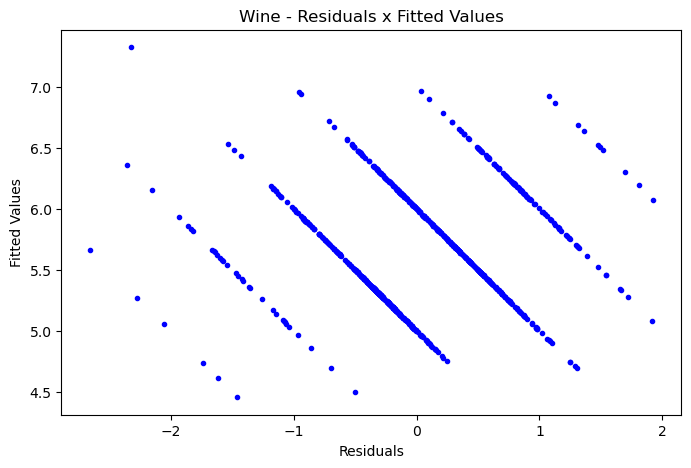

In [38]:
# Residuals x Fitted Values

plt.figure(figsize = (8,5))
plt.plot(lr_sm.resid, y_pred_train_sm, ".", color = "blue")
plt.xlabel("Residuals")
plt.ylabel("Fitted Values")
plt.title("Wine - Residuals x Fitted Values");

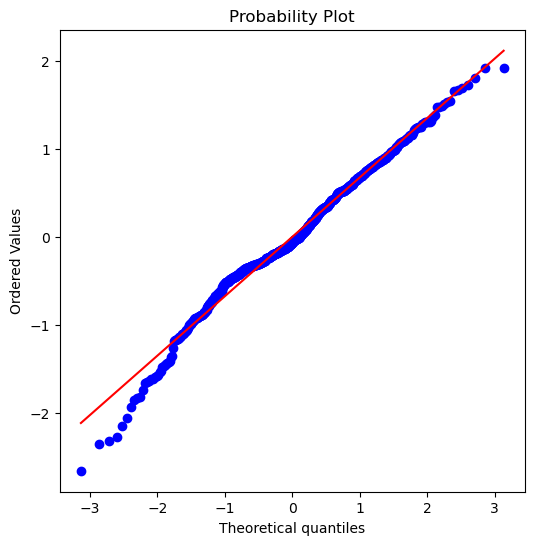

In [39]:
# Normality plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,6))

sp.stats.probplot(lr_sm.resid, plot = ax, fit = True);

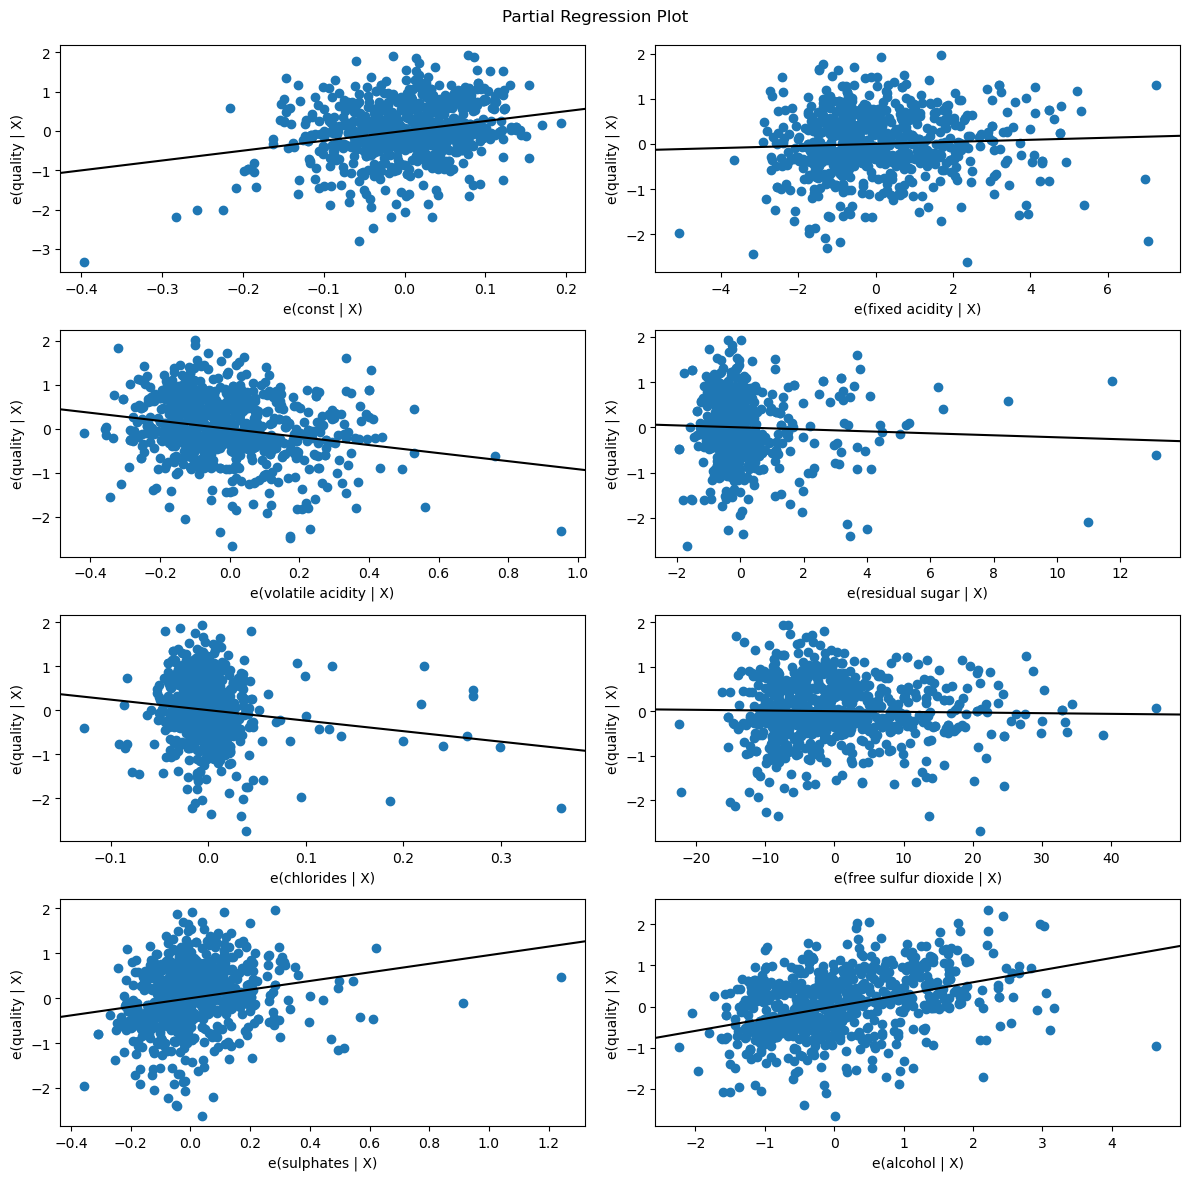

In [40]:
fig = plt.figure(figsize=(12,12))

fig = sm.graphics.plot_partregress_grid(lr_sm, fig = fig)

In [41]:
# Treinando novamente o modelo

wine2 = df[["volatile acidity", "chlorides", "sulphates", "alcohol", "quality"]]

x = wine2.drop('quality', axis = 1)
y = wine2['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.50)

x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

lr_sm2 = sm.OLS(y_train, x_train_).fit()

y_pred_train_sm = lr_sm2.predict(x_train_)

y_pred_test_sm = lr_sm2.predict(x_test_)

# Print out the statistics
lr_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     108.2
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           1.30e-73
Time:                        10:39:47   Log-Likelihood:                -806.23
No. Observations:                 799   AIC:                             1622.
Df Residuals:                     794   BIC:                             1646.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.1272      0.286     10.918      0.000       2.565       3.689
volatile acidity    -1.3495      0.138     -9.803      0.000      -1.620      -1.079
chlorides           -2.1548      0.531     -4.056      0.000      -3.198      -1.112
sulphates            0.9518      0.163      5.840      0.000       0.632       1.272
alcohol              0.2678      0.024     11.369      0.000       0.222       0.314
==============================================================================
Omnibus:                        4.584   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                5.262
Skew:                          -0.073   Prob(JB):                       0.0720
Kurtosis:                       3.370   Cond. No.                         242.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""